In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
gdp_df = pd.read_csv('C:\\Users\\jtbes\\Documents\\DA8\\Projects\\gdp-and-internet-usage-jtbest\\data\\gdp_percapita.csv')

In [8]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB


gdp_df has 4 columns and 7176 rows. Country - object; Year - int64; Value - float64; Value Footnotes - float64

In [9]:
gdp_df.drop(labels=['Value Footnotes'],axis=1, inplace=True)

In [10]:
gdp_df.rename(columns={'Value': 'GDP_Per_Capita'}, inplace=True)
gdp_df.rename(columns={'Country or Area': 'Countries'}, inplace=True)

In [11]:
gdp_df.loc[gdp_df['Year'].notnull()]

,Countries,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978
...,...,...,...
7171,Zimbabwe,1994,2603.927369
7172,Zimbabwe,1993,2420.092791
7173,Zimbabwe,1992,2437.152908
7174,Zimbabwe,1991,2733.696626


In [12]:

gdp_df['Countries'].value_counts()
all_years = gdp_df.groupby('Countries').filter(lambda x: len(x)==31)
print(len(all_years)/(gdp_df['Year'].max()-gdp_df['Year'].min()+1))

205.0


205 countries have data for all years listed. 

In [13]:
gdp_df["Countries"].nunique()

242

In [14]:
gdp_df['Countries'].value_counts(ascending=True).reset_index().head(10)

,index,Countries
0,Somalia,8
1,Djibouti,8
2,Turks and Caicos Islands,10
3,Sint Maarten (Dutch part),10
4,Kosovo,13
5,Cayman Islands,15
6,Nauru,17
7,Afghanistan,19
8,SÃ£o TomÃ© and Principe,20
9,Timor-Leste,21


The countries listed above, for example, Somalia, Djibouti, Turks and Caicos, Sint Maarten, etc. have greater proportions of missing years. 

In [15]:
gdp_df['Year'].value_counts(ascending=True).reset_index()

,index,Year
0,1990,206
1,1991,207
2,1992,208
3,1993,209
4,1994,211
5,1995,222
6,1996,222
7,1997,226
8,1998,226
9,1999,227


More countries are added to this dataframe as the years go on. 

(array([30., 35., 17., 10., 18., 19., 17., 11.,  7.,  6.,  3.,  8.,  4.,
         5.,  3.,  2.,  3.,  5.,  7.,  3.,  4.,  2.,  3.,  2.,  3.,  2.,
         1.,  2.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([   731.06407364,   2967.58898161,   5204.11388957,   7440.63879754,
          9677.1637055 ,  11913.68861346,  14150.21352143,  16386.73842939,
         18623.26333735,  20859.78824532,  23096.31315328,  25332.83806124,
         27569.36296921,  29805.88787717,  32042.41278513,  34278.9376931 ,
         36515.46260106,  38751.98750902,  40988.51241699,  43225.03732495,
         45461.56223291,  47698.08714088,  49934.61204884,  52171.1369568 ,
         54407.66186477,  56644.18677273,  58880.71168069,  61117.23658866,
         63353.76149662,  65590.28640459,  67826.81131255,  70063.33622051,
         72299.86112848,  74536.38603644,  76772.9109444 ,  79009.43585237,
         81245.96076033,  83482.

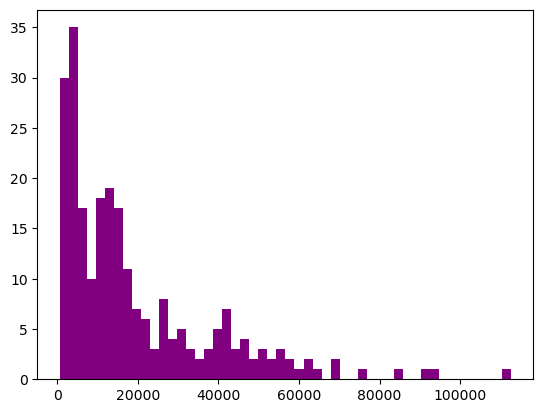

In [16]:
gdp_2020 = gdp_df[(gdp_df['Year']==2020)]
plt.hist(gdp_2020['GDP_Per_Capita'], 50, color = 'purple')

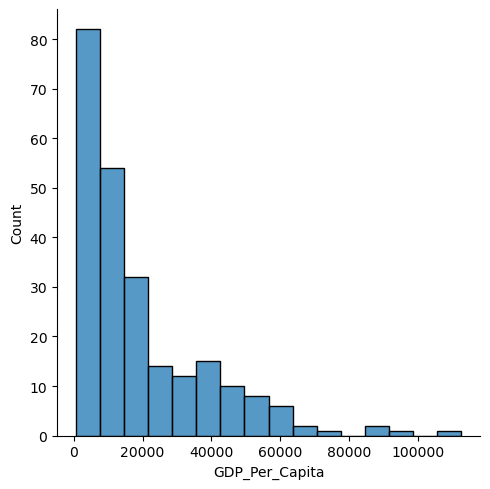

In [17]:
sns.displot(gdp_2020["GDP_Per_Capita"])

<AxesSubplot:xlabel='GDP_Per_Capita', ylabel='Density'>

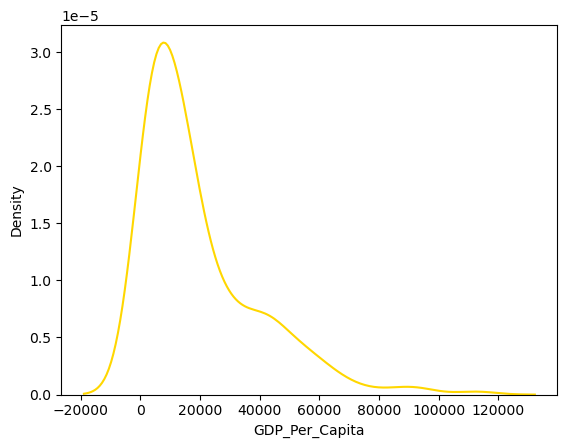

In [18]:
sns.kdeplot(gdp_2020['GDP_Per_Capita'], color = 'gold')

C:\Users\jtbes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

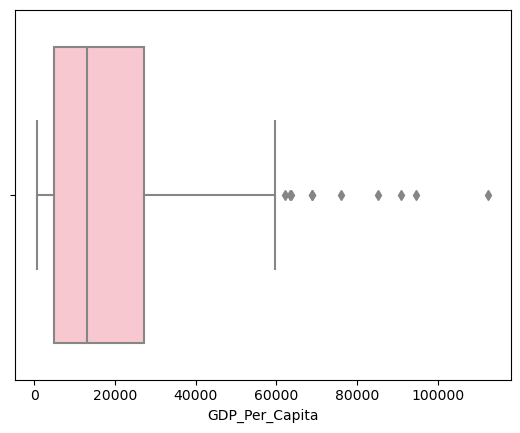

In [19]:
sns.boxplot(gdp_2020['GDP_Per_Capita'], color = 'pink')

C:\Users\jtbes\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='GDP_Per_Capita'>

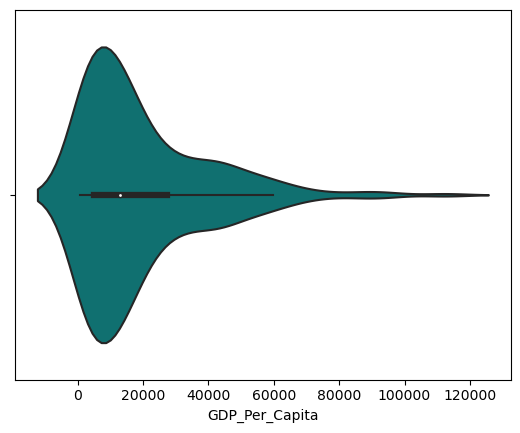

In [20]:
sns.violinplot(gdp_2020['GDP_Per_Capita'], color = 'teal')

These plots all help visualize the distribution of data for 2020. Many countries clustered around 20,000, with a small number of outliers with much higher values. 

The box plot is valuable becuase it identifies quartile values as well as potential outliers. 

In [21]:
gdp_2020['GDP_Per_Capita'].median()

12908.9374056206

Median GDP per capita in 2020 was 12909

Q10

In [22]:
decade = 10*(gdp_df['Year']//10)
gdp_df['Decade'] = decade
print(gdp_df)

        Countries  Year  GDP_Per_Capita  Decade
0     Afghanistan  2020     1970.560169    2020
1     Afghanistan  2019     2065.036235    2010
2     Afghanistan  2018     2033.804389    2010
3     Afghanistan  2017     2058.400221    2010
4     Afghanistan  2016     2057.067978    2010
...           ...   ...             ...     ...
7171     Zimbabwe  1994     2603.927369    1990
7172     Zimbabwe  1993     2420.092791    1990
7173     Zimbabwe  1992     2437.152908    1990
7174     Zimbabwe  1991     2733.696626    1990
7175     Zimbabwe  1990     2652.129209    1990

[7176 rows x 4 columns]


<AxesSubplot:xlabel='Decade', ylabel='GDP_Per_Capita'>

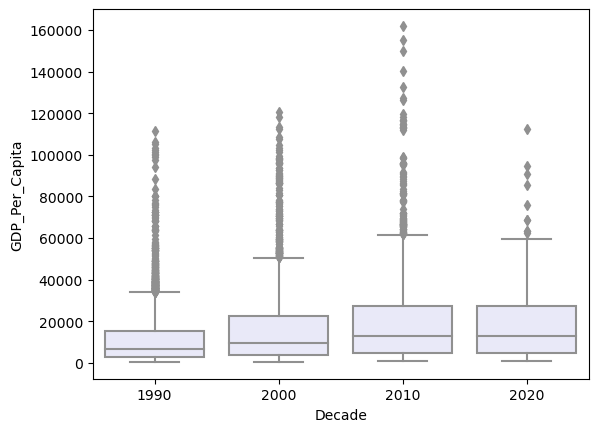

In [23]:
sns.boxplot(x=gdp_df['Decade'], y=gdp_df['GDP_Per_Capita'], color='lavender')

<AxesSubplot:xlabel='Decade', ylabel='GDP_Per_Capita'>

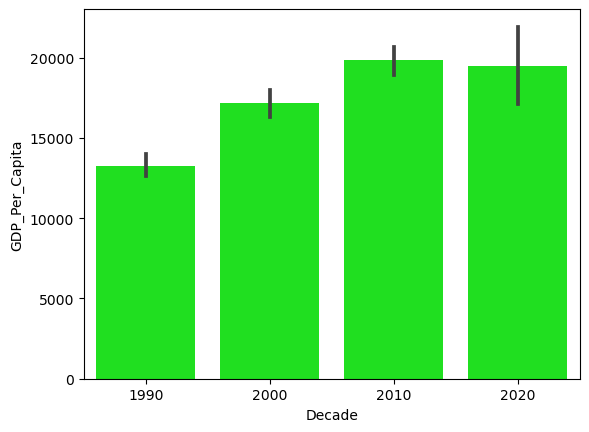

In [24]:
sns.barplot(x=gdp_df['Decade'], y=gdp_df['GDP_Per_Capita'], color='lime')

<AxesSubplot:xlabel='Decade', ylabel='GDP_Per_Capita'>

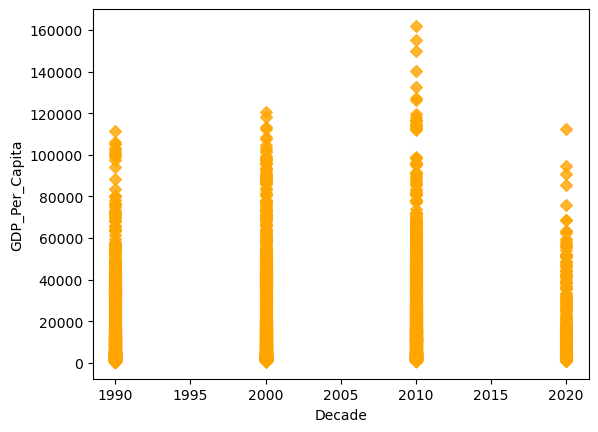

In [25]:
sns.regplot(x=gdp_df['Decade'], y=gdp_df['GDP_Per_Capita'], color='orange', fit_reg = False, marker = 'D')

<AxesSubplot:xlabel='Decade', ylabel='GDP_Per_Capita'>

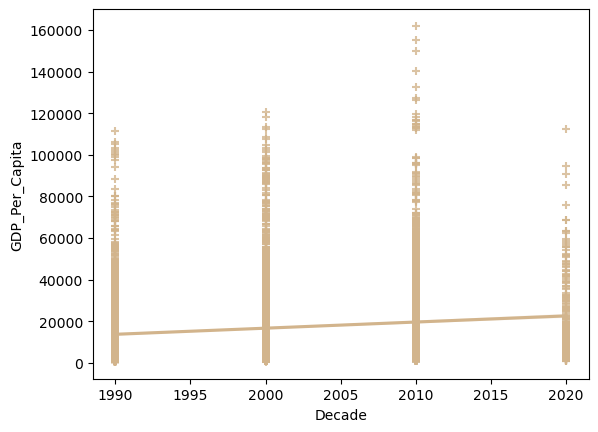

In [26]:
sns.regplot(x=gdp_df['Decade'], y=gdp_df['GDP_Per_Capita'], color='tan', fit_reg = True, marker = '+')

Q10: GDP per capita has increased over time, small dip in 2020. I prefer the box plot, as it shows the shape of the data more. The box plot is fine too. Scatter plots are not very appropriate here. 


In [27]:
rich_folks = gdp_df[(gdp_df['GDP_Per_Capita'] >= 100000)]
print(rich_folks.sort_values(by=['Year']))

                 Countries  Year  GDP_Per_Capita  Decade
6838  United Arab Emirates  1990   111454.055665    1990
6837  United Arab Emirates  1991   106103.552655    1990
6836  United Arab Emirates  1992   103470.924576    1990
6834  United Arab Emirates  1994   100213.156226    1990
6833  United Arab Emirates  1995   101570.992100    1990
6832  United Arab Emirates  1996   102211.638844    1990
6831  United Arab Emirates  1997   105108.996265    1990
6830  United Arab Emirates  1998   100100.435658    1990
6828  United Arab Emirates  2000   102494.714624    2000
3901            Luxembourg  2001   101143.147977    2000
3900            Luxembourg  2002   103317.331098    2000
3899            Luxembourg  2003   104743.000088    2000
3898            Luxembourg  2004   107634.837198    2000
3897            Luxembourg  2005   108632.360016    2000
3896            Luxembourg  2006   113346.035782    2000
3895            Luxembourg  2007   120647.822959    2000
3894            Luxembourg  200

Q11. UAE was the first to do it, starting in 1990 (as far back as data goes). 


                 Countries  Year  GDP_Per_Capita  Decade
6828  United Arab Emirates  2000   102494.714624    2000
3902            Luxembourg  2000    99301.526999    2000
5401                 Qatar  2000    86566.302850    2000
659                Bermuda  2000    83181.526342    2000
5566            San Marino  2000    74121.589761    2000
...                    ...   ...             ...     ...
5484                Rwanda  2000      867.615191    2000
934                Burundi  2000      828.000479    2000
1544       Dem. Rep. Congo  2000      751.557757    2000
1981              Ethiopia  2000      727.766685    2000
4536            Mozambique  2000      630.701614    2000

[233 rows x 4 columns]


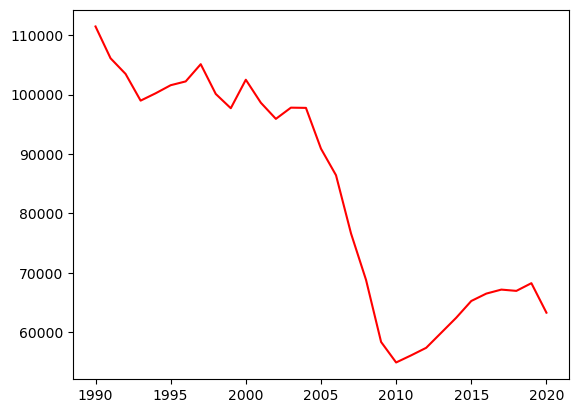

In [28]:
print(gdp_df[(gdp_df['Year']==2000)].sort_values(by=['GDP_Per_Capita'], ascending = False))
uae_gdp = gdp_df[(gdp_df['Countries'] == 'United Arab Emirates')]
plt.plot(uae_gdp['Year'],uae_gdp['GDP_Per_Capita'], color = 'red')

Q12. This highest GDP per capita in 2020 was again UAE. They had a tough stretch after 2005 

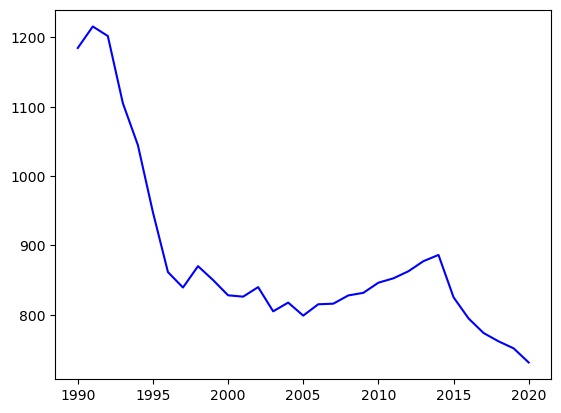

In [29]:
poor_folks = gdp_df[(gdp_df['Year']==2020)].sort_values(by='GDP_Per_Capita')
burundi_gdp = uae_gdp = gdp_df[(gdp_df['Countries'] == 'Burundi')]
plt.plot(burundi_gdp['Year'],burundi_gdp['GDP_Per_Capita'], color = 'blue')

Burundi was the poorest country in 2020

Year
1990     6028.144732
1991     6016.906969
1992     5778.652080
1993     5907.777946
1994     6028.795544
1995     6416.338886
1996     6673.972007
1997     7135.647097
1998     7564.513710
1999     7852.710834
2000     8176.344448
2001     8322.976385
2002     8346.860012
2003     8471.869129
2004     8947.515746
2005     9253.149721
2006     9856.973196
2007    10441.604395
2008    10823.097476
2009    10782.347384
2010    10970.692420
2011    11127.554975
2012    11363.564855
2013    11724.629796
2014    12178.874687
2015    12587.102350
2016    12946.503342
2017    13280.611125
2018    13861.027969
2019    13709.966375
2020    12908.937406
Name: GDP_Per_Capita, dtype: float64


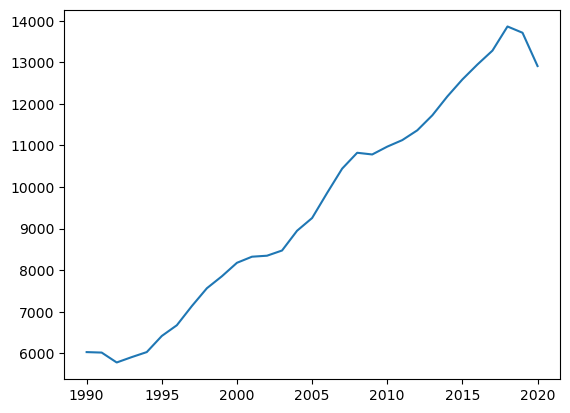

In [30]:
median_gdp = gdp_df.groupby(['Year']).GDP_Per_Capita.median()
plt.plot(median_gdp)
print(median_gdp)

In [31]:
start_end = gdp_df[(gdp_df['Year'] == 1990) | (gdp_df['Year'] == 2020)]
pivot_data = start_end.pivot(index='Countries', columns='Year', values='GDP_Per_Capita')
pivot_data['Difference'] = pivot_data[1990] - pivot_data[2020]
print(pivot_data[(pivot_data['Difference']>0)].sort_values(by='Difference', ascending = False))


Year                                               1990          2020  \
Countries                                                               
United Arab Emirates                      111454.055665  63299.422971   
The Bahamas                                38073.864915  27555.657353   
Brunei                                     71232.789430  62200.882043   
Ukraine                                    16428.480469  12407.790039   
Gabon                                      18179.170002  14320.844646   
Aruba                                      32589.018572  29563.756955   
Congo                                       5068.286948   3497.565454   
Oman                                       30333.874281  29502.059669   
Dem. Rep. Congo                             1819.723315   1082.445242   
Barbados                                   13985.829980  13316.487393   
Haiti                                       3541.410107   2934.245881   
Zimbabwe                                    2652.12

Q13 Bonus: Yes, in general GDP did rise over time, but had a fall after 2020. The 22 countries above saw their GDP fall. 

In [32]:
internet_df = pd.read_csv('C:\\Users\\jtbes\\Documents\\DA8\\Projects\\gdp-and-internet-usage-jtbest\\data\\internet_use.csv', nrows=4495)

In [33]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
 3   Value Footnotes  948 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 140.6+ KB


In [34]:
internet_df.drop(labels=['Value Footnotes'],axis=1, inplace=True)

In [35]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [36]:
internet_df.rename(columns={'Value': 'Internet_Users_Pct'}, inplace=True)
internet_df.rename(columns={'Country or Area': 'Country'}, inplace=True)

In [37]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


In [38]:
per_year = internet_df.groupby(['Year']).count()

In [39]:
print(per_year)

      Country  Internet_Users_Pct
Year                             
1960        7                   7
1965        7                   7
1970        7                   7
1975        7                   7
1976        7                   7
1977        7                   7
1978        7                   7
1979        7                   7
1980        7                   7
1981        7                   7
1982        7                   7
1983        7                   7
1984        7                   7
1985        7                   7
1986        7                   7
1987        7                   7
1988        7                   7
1989        8                   8
1990      210                 210
1991       39                  39
1992       50                  50
1993       65                  65
1994       91                  91
1995      138                 138
1996      175                 175
1997      184                 184
1998      190                 190
1999      198 

Q16. Many more observations after 1990, a fall at 1991, and another jump up in 1995

In [40]:
internet_df[(internet_df['Internet_Users_Pct'] > 0)].sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


Q17. 1990 was the first year with internet users in this data set 

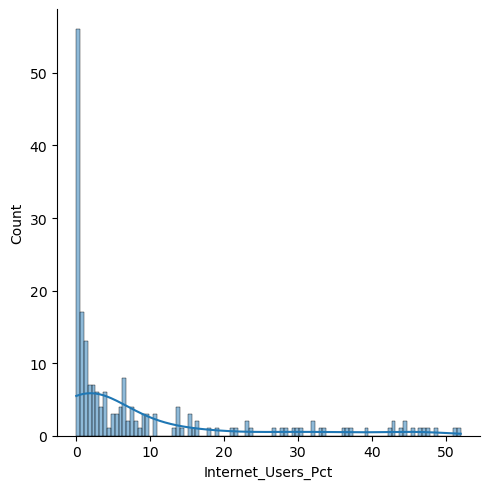

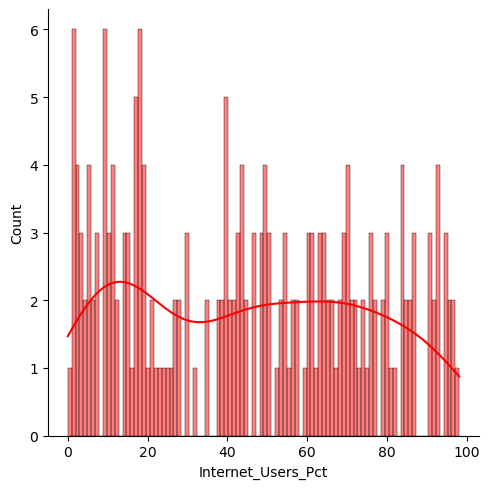

In [41]:
import seaborn as sns
int_2000 = internet_df[(internet_df['Year']==2000)]
int_2014 = internet_df[(internet_df['Year']==2014)]

sns.displot(int_2000["Internet_Users_Pct"], bins=100, kde=True, rug=False)
sns.displot(int_2014["Internet_Users_Pct"], bins=100, kde=True, rug=False, color = 'red')

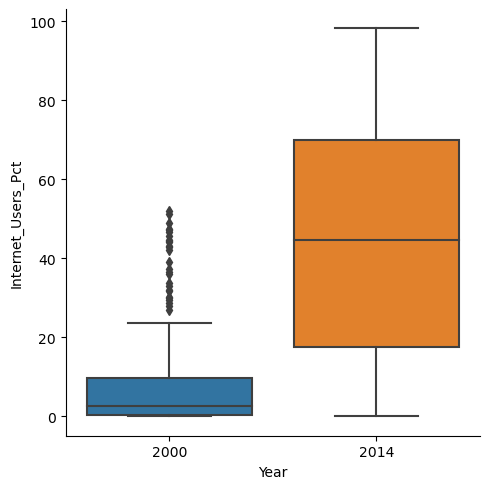

In [42]:
cat_df = pd.concat([int_2000, int_2014])

# create boxplot using catplot
sns.catplot(x='Year', y='Internet_Users_Pct', kind='box', data=cat_df)

Q18. The overall distribution moved towards more internet users in 2014. Still, many countries have low levels of access. 


In [43]:
below_5 = internet_df[(internet_df['Internet_Users_Pct'] < 0.05)]
print(len(below_5[(below_5['Year'] == 2014)].index))

1


In [44]:
print(below_5[(below_5['Year'] == 2014)].sort_values(by = 'Year', ascending = False))

                          Country  Year  Internet_Users_Pct
1065  Dem. People's Rep. of Korea  2014                 0.0


Q19. 

Only one country, North Korea, has fewer than 5% of internet users in 2014

In [45]:
internet_df.info()
gdp_df.rename(columns={'Countries': 'Country'}, inplace=True)
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         7176 non-null   object 
 1   Year            7176 non-null   int64  
 2   GDP_Per_Capita  7176 non-null   float64
 3   Decade          7176 non-null   int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 224.4+ KB


In [46]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='left')

gdp_and_internet_use.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7176 entries, 0 to 7175
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             7176 non-null   object 
 1   Year                7176 non-null   int64  
 2   GDP_Per_Capita      7176 non-null   float64
 3   Decade              7176 non-null   int64  
 4   Internet_Users_Pct  3415 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 336.4+ KB


In [47]:
print(gdp_and_internet_use)

          Country  Year  GDP_Per_Capita  Decade  Internet_Users_Pct
0     Afghanistan  2020     1970.560169    2020                 NaN
1     Afghanistan  2019     2065.036235    2010                 NaN
2     Afghanistan  2018     2033.804389    2010                 NaN
3     Afghanistan  2017     2058.400221    2010                 NaN
4     Afghanistan  2016     2057.067978    2010                 NaN
...           ...   ...             ...     ...                 ...
7171     Zimbabwe  1994     2603.927369    1990            0.001739
7172     Zimbabwe  1993     2420.092791    1990                 NaN
7173     Zimbabwe  1992     2437.152908    1990                 NaN
7174     Zimbabwe  1991     2733.696626    1990                 NaN
7175     Zimbabwe  1990     2652.129209    1990            0.000000

[7176 rows x 5 columns]


In [206]:
gdp_and_internet_use.to_csv('test.csv', index=False, sep='\t', encoding='utf-8-sig')

In [58]:
top3 = gdp_and_internet_use.sort_values(by = 'Internet_Users_Pct', ascending = False).head(3)
print(top3)

gdp_and_internet_use['Internet_Rank'] = gdp_and_internet_use.groupby('Year')['Internet_Users_Pct'].rank(ascending=False, na_option='bottom')
gdp_and_internet_use['GDP_Rank'] = gdp_and_internet_use.groupby('Year')['GDP_Per_Capita'].rank(ascending=False, na_option='bottom')
print(gdp_and_internet_use)

top3=gdp_and_internet_use[(gdp_and_internet_use['Year']==2014)].sort_values(by = 'Internet_Rank', ascending = True).head(3)
print(top3)

      Country  Year  GDP_Per_Capita  Decade  Internet_Users_Pct  \
2803  Iceland  2014    50450.741612    2010             98.1600   
645   Bermuda  2014    77361.104881    2010             96.8000   
2804  Iceland  2013    50168.688535    2010             96.5468   

      Internet_Rank  GDP_Rank  
2803            1.0      21.0  
645             2.0       5.0  
2804            1.0      20.0  
          Country  Year  GDP_Per_Capita  Decade  Internet_Users_Pct  \
0     Afghanistan  2020     1970.560169    2020                 NaN   
1     Afghanistan  2019     2065.036235    2010                 NaN   
2     Afghanistan  2018     2033.804389    2010                 NaN   
3     Afghanistan  2017     2058.400221    2010                 NaN   
4     Afghanistan  2016     2057.067978    2010                 NaN   
...           ...   ...             ...     ...                 ...   
7171     Zimbabwe  1994     2603.927369    1990            0.001739   
7172     Zimbabwe  1993     2420.09

In [66]:

top_countries = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values('Internet_Rank', ascending=True)['Country'].iloc[:3]


filtered_df = gdp_and_internet_use[(gdp_and_internet_use['Country'].isin(top_countries))]


print(filtered_df)


      Country  Year  GDP_Per_Capita  Decade  Internet_Users_Pct  \
639   Bermuda  2020    76105.138057    2020                 NaN   
640   Bermuda  2019    81681.726668    2010                 NaN   
641   Bermuda  2018    81423.408453    2010                 NaN   
642   Bermuda  2017    81834.955874    2010                 NaN   
643   Bermuda  2016    78149.352535    2010                 NaN   
...       ...   ...             ...     ...                 ...   
4900   Norway  1994    47541.766710    1990            4.152450   
4901   Norway  1993    45512.390217    1990            2.783991   
4902   Norway  1992    44517.435716    1990            2.216366   
4903   Norway  1991    43229.916320    1990            1.407395   
4904   Norway  1990    42136.603168    1990            0.707299   

      Internet_Rank  GDP_Rank  
639           120.5       5.0  
640           121.0       6.0  
641           121.5       6.0  
642           121.5       5.0  
643           121.5       5.0  
...

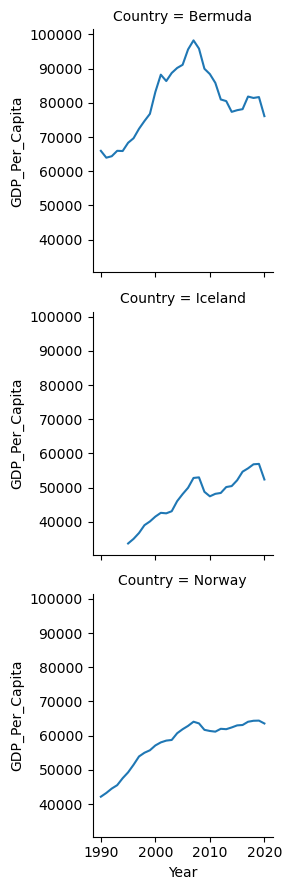

In [71]:
g = sns.FacetGrid(filtered_df, row="Country")
g.map(sns.lineplot, 'Year', 'GDP_Per_Capita')